In [2]:
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams.update({
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern Roman"],
        "text.latex.preamble": r"\usepackage{amsmath,amssymb,amsfonts,mathrsfs,bm}",
        "axes.labelsize": 20,
        "font.size": 20,
        "legend.fontsize": 14,
        "xtick.labelsize": 14,
        "ytick.labelsize": 20,
        "axes.titlesize": 22
    })

In [3]:
data = {
    "Original": {
        3: 34,
        4: 28,
        5: 22,
        6: 26,
        7: 14,
        8: 18,
        9: 22,
        10: 18,
    },
    "Non-Curriculum": {
        3: 88,
        4: 78,
        5: 70,
        6: 72,
        7: 50,
        8: 54,
        9: 40,
        10: 46,
    },
    "Curriculum": {
        3: 100,
        4: 92,
        5: 86,
        6: 90,
        7: 70,
        8: 70,
        9: 56,
        10: 64,
    }
}

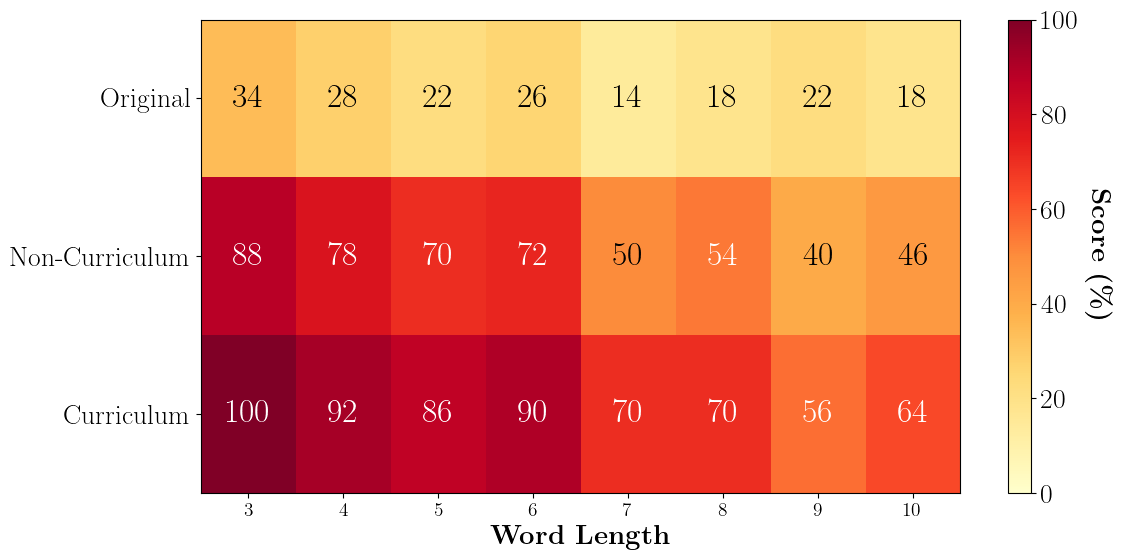

In [4]:

cats   = list(data.keys())         # y-axis
grades = list(range(3, 11))        # x-axis

mat = np.array([[data[cat].get(g, 0) for g in grades] for cat in cats])

fig, ax = plt.subplots(
    figsize=(max(12, len(grades) * 1.0), max(4, len(cats) * 2.0))
)

im = ax.imshow(mat, cmap="YlOrRd", vmin=0, vmax=100, aspect="auto")

# numbers inside cells
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text_color = "white" if mat[i, j] > 50 else "black"
        ax.text(j, i, f"{mat[i, j]}", ha="center", va="center", fontsize=24, color=text_color)

ax.set_xticks(range(len(grades)))
ax.set_xticklabels(grades)
ax.set_yticks(range(len(cats)))
ax.set_yticklabels(cats)
ax.set_xlabel(r"\textbf{Word Length}")

cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r"\textbf{Score (\%)}", rotation=-90, va="bottom")

plt.tight_layout()

# save as pdf with high resolution
plt.savefig("curriculum_heatmap.pdf", dpi=300, bbox_inches="tight")

